In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.special import erfc

In [360]:
df = pd.read_csv('../docs 2nd Approach/relative_error.csv')
df = df.apply(lambda x: x.sort_values().values)
list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
df_melt = df_melt.drop(columns=['index'])
# replace column names
df_melt.columns = ['voltage', 'value']
df_melt

,voltage,value
0,0.5v,-24.000000
1,0.5v,-24.000000
2,0.5v,-24.000000
3,0.5v,-18.000000
4,0.5v,-14.000000
...,...,...
8995,24.5v,0.203915
8996,24.5v,0.203915
8997,24.5v,0.203915
8998,24.5v,0.203915


In [361]:
def chauvenet(array):
    mean = array.mean()           # Mean of incoming array
    stdv = array.std()            # Standard deviation
    N = len(array)                # Lenght of incoming array
    criterion = 1.0/(2*N)         # Chauvenet's criterion
    d = abs(array-mean)/stdv      # Distance of a value to mean in stdv's
    prob = erfc(d)                # Area normal dist.    
    return prob < criterion       # Use boolean array outside this function ,

In [362]:
df = {}
df_remove = df_melt
df_remove = df_remove.reset_index()

In [363]:
count = 0 
while(len(df_remove[chauvenet(df_remove['value']) == True]) != 0 ):
    len_0 = len(df_remove)
    print(df_remove['value'].mean())
    df[f'Iteration - {count}'] = [df_remove['value'].mean(), df_remove['value'].std()]
    df_remove = df_remove.drop(df_remove[chauvenet(df_remove['value']) == True].index)
    df[f'Iteration - {count}'].append(len_0 - len(df_remove))
    df_remove = df_remove.reset_index(drop=True)
    count += 1

df = pd.DataFrame(df, index=['Mean', 'Standard Deviation', 'Outlier'])


0.2225284506110743
-0.015236120791773023
0.032478250774741674
0.03859681228091425
0.004026113512708367
0.004998000895654252
0.0060531411569315985


In [364]:
df.to_excel('../docs 2nd Approach/chauvenet_result_iteration.xlsx')
df

,Iteration - 0,Iteration - 1,Iteration - 2,Iteration - 3,Iteration - 4,Iteration - 5,Iteration - 6
Mean,0.222528,-0.015236,0.032478,0.038597,0.004026,0.004998,0.006053
Standard Deviation,1.666542,0.486810,0.227936,0.189877,0.123579,0.109826,0.100438
Outlier,386.000000,107.000000,122.000000,440.000000,122.000000,152.000000,64.000000


In [365]:
df.to_csv('../docs 2nd Approach/Chauvenet_Table.csv', index=False)
df_remove.to_csv('../docs 2nd Approach/remove_outlier_chauvenet.csv', index=False)

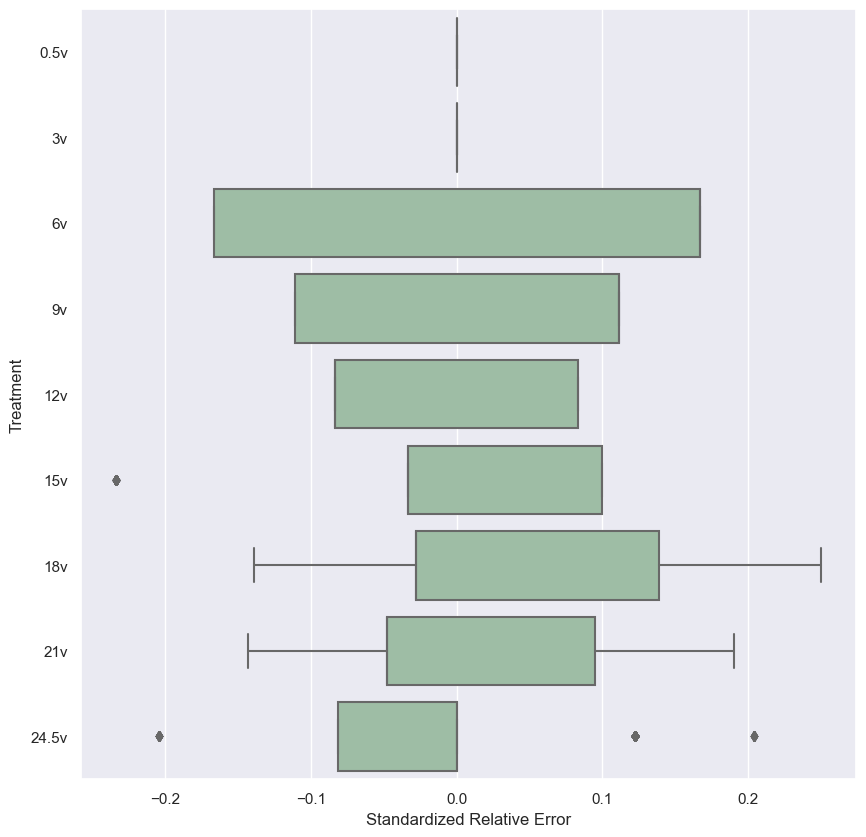

In [366]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('darkgrid')
ax = sns.boxplot(x='value', y='voltage', data=df_remove, color='#99c2a2')
ax.set(xlabel='Standardized Relative Error', ylabel='Treatment')
plt.savefig('../docs 2nd Approach/img/Boxplot Remove Outlier Chauvenet Criterion.png')
plt.show()

Text(0, 0.5, 'Relative Error Voltage')

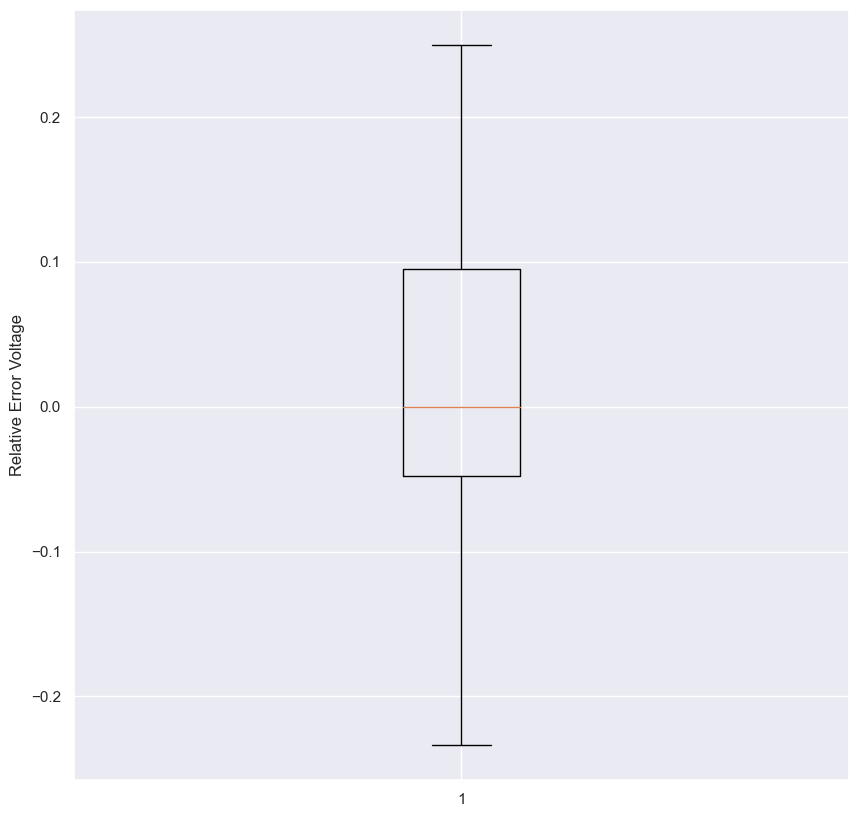

In [367]:
plt.boxplot(df_remove['value'])
plt.ylabel('Relative Error Voltage')

In [368]:
df_remove

,index,voltage,value
0,124,0.5v,0.000000
1,125,0.5v,0.000000
2,126,0.5v,0.000000
3,127,0.5v,0.000000
4,128,0.5v,0.000000
...,...,...,...
7602,8995,24.5v,0.203915
7603,8996,24.5v,0.203915
7604,8997,24.5v,0.203915
7605,8998,24.5v,0.203915
